Projeto 1 - Intermediário - Lucas Cipolla

In [1]:
#chamando nossos 4 cavaleiros do apocalipse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Separando os datasets de treino e teste

In [2]:
dftr = pd.read_csv("train-projeto.csv")
dfte = pd.read_csv("test-projeto.csv")

Identificando quais dados são de treino e quais de teste

In [3]:
dftr['0-Treino/1-Teste'] = 0
dfte['0-Treino/1-Teste'] = 1

Juntando os datasets

In [4]:
df = dftr.append(dfte, ignore_index=True)

Analisando o cabeçalho do dataset

In [5]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,0-Treino/1-Teste
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1.0,35,5.0,8,0,49.0,0.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1.0,30,5.0,4,0,60.0,0.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1.0,34,3.0,7,0,50.0,0.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2.0,39,1.0,10,0,50.0,0.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1.0,45,3.0,2,0,73.0,0.0,0


Analisando os dados

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       71379 non-null  float64
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  awards_won?           78298 non-null  int64  
 11  avg_training_score    70840 non-null  float64
 12  is_promoted           54808 non-null  float64
 13  0-Treino/1-Teste      78298 non-null  int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 8.4+ MB


Analisando as variáveis categóricas

In [7]:
df.describe(include=['object'])

,department,region,education,gender,recruitment_channel
count,78298,78298,74855,78298,78298
unique,10,35,3,5,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,24155,17642,52247,50232,43524


Primeira coluna: Departamento

In [8]:
print(pd.Series(df.department.unique()), end='\n\n')

0     Sales & Marketing
1            Operations
2            Technology
3             Analytics
4                   R&D
5           Procurement
6               Finance
7                    HR
8                 Legal
9    quem trouxe quenga
dtype: object



quem trouxe quenga não parece um departamento muito sério...

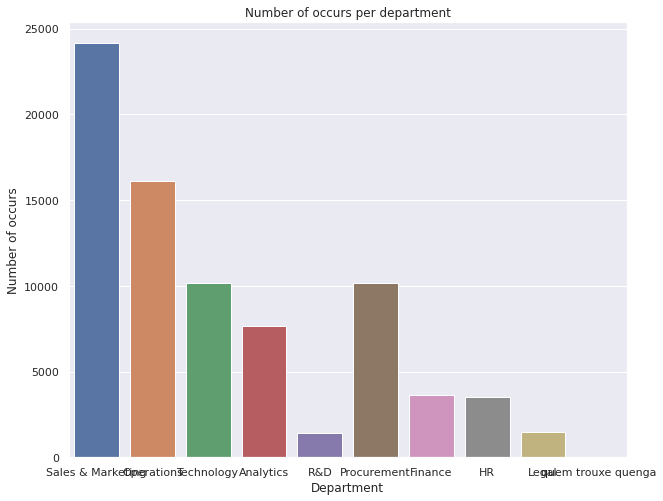

In [9]:
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
sns.countplot(x=df['department'])
plt.xlabel("Department")
plt.ylabel("Number of occurs")
plt.title('Number of occurs per department')
plt.show()

Existem poucas quengas no dataset, podemos apenas deletá-las

In [10]:
indexOthers = df[df['department'] == 'quem trouxe quenga'].index
df.drop(indexOthers , inplace=True)

tchau quengas 👋🏻

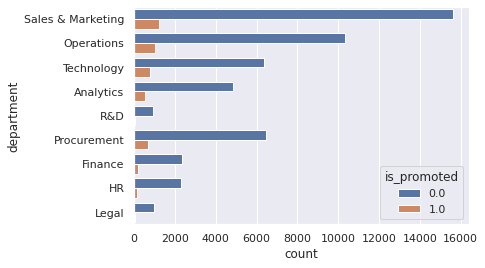

In [11]:
sns.countplot(y='department', hue='is_promoted', data=df)

tem algumas áreas que não tem muita promoção né, mas tudo bem faz parte do modelo

Segunda coluna: Região

In [12]:
print(pd.Series(df.region.unique()), end='\n\n')

0                 region_7
1                region_22
2                region_19
3                region_23
4                region_26
5                 region_2
6                region_20
7                region_34
8                 region_1
9                 region_4
10               region_29
11               region_31
12               region_15
13               region_14
14               region_11
15                region_5
16               region_28
17               region_17
18               region_13
19               region_16
20               region_25
21               region_10
22               region_27
23               region_30
24               region_12
25               region_21
26                region_8
27               region_32
28                region_6
29               region_33
30               region_24
31                region_3
32                region_9
33               region_18
34    casa da lu na suecia
dtype: object



a casa da lu na suécia deve ser um lugar legal, mas um pouco longe né...

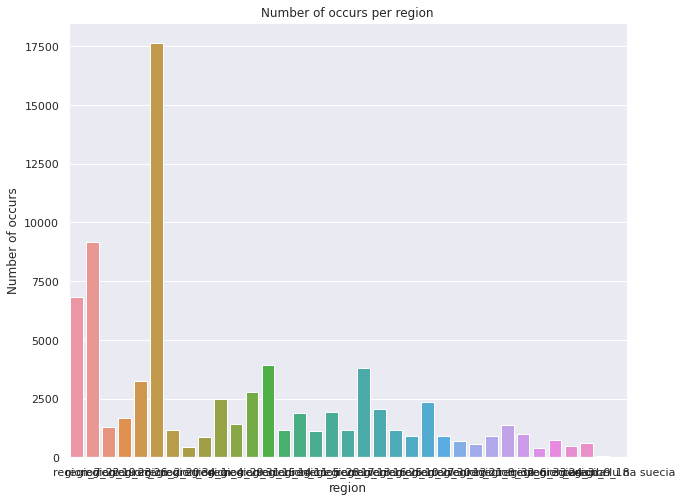

In [13]:
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
sns.countplot(x=df['region'])
plt.xlabel("region")
plt.ylabel("Number of occurs")
plt.title('Number of occurs per region')
plt.show()

vamos tirar os poucos invasores da casa da lu!

In [14]:
indexOthers = df[ df['region'] == 'casa da lu na suecia'].index
df.drop(indexOthers , inplace=True)

da próxima vez, não se misturem com essa gentalha!

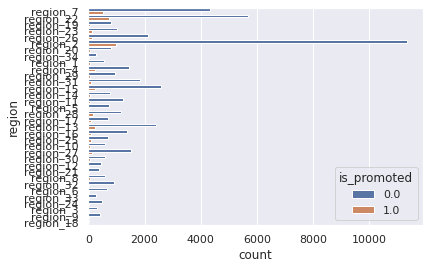

In [15]:
sns.countplot(y='region', hue='is_promoted', data=df)

que bagunça! mas deu pra ver que a região talvez importe um pouco para a promoção né? será que o pessoal que mora longe tem mais dificuldade?

Terceira coluna: Educação

In [16]:
print(pd.Series(df.education.unique()), end='\n\n')

0    Master's & above
1          Bachelor's
2                 NaN
3     Below Secondary
dtype: object



não gostamos de NaNs!

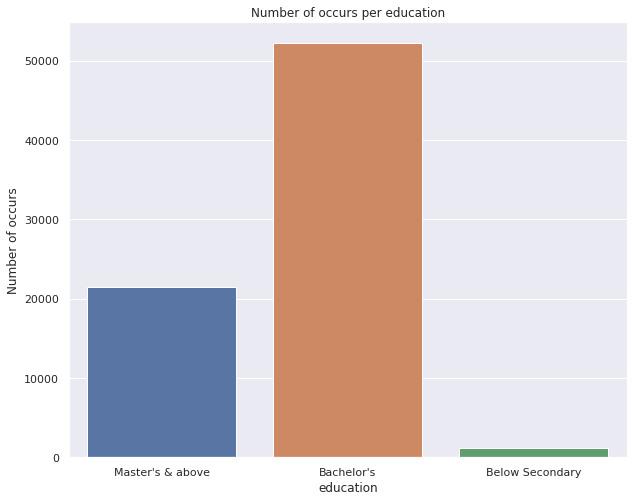

In [17]:
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
sns.countplot(x=df['education'])
plt.xlabel("education")
plt.ylabel("Number of occurs")
plt.title('Number of occurs per education')
plt.show()

ué, cade a galera do ensino médio? será que estão no NaN?

In [18]:
print(df[df['education'].notna() == False].count())

employee_id             3443
department              3443
region                  3443
education                  0
gender                  3443
recruitment_channel     3443
no_of_trainings         3071
age                     3443
previous_year_rating    2883
length_of_service       3443
awards_won?             3443
avg_training_score      3059
is_promoted             2409
0-Treino/1-Teste        3443
dtype: int64


são quase 3500 empregados sem registro... deve ser pertinente criar uma coluna para eles!

In [19]:
df['education'] = df['education'].fillna('Secondary?')

Agora sim, nossos NaNs viraram Secondary!

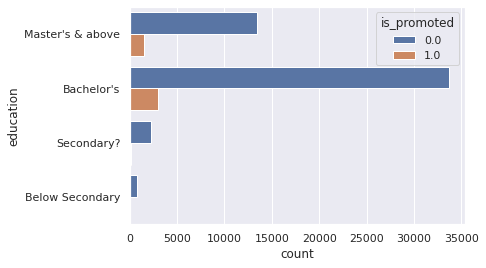

In [20]:
sns.countplot(y='education', hue='is_promoted', data=df)

Parece fazer bastante sentido que o pessoal sem registro seja do ensino médio... mas ainda é apenas uma hipótese!

Quarta coluna: Gênero

In [21]:
print(pd.Series(df.gender.unique()), end='\n\n')

0                                   f
1                                   m
2                                MALE
3                              fEMALE
4    eu sou homem hetero homossexual!
dtype: object



🤨

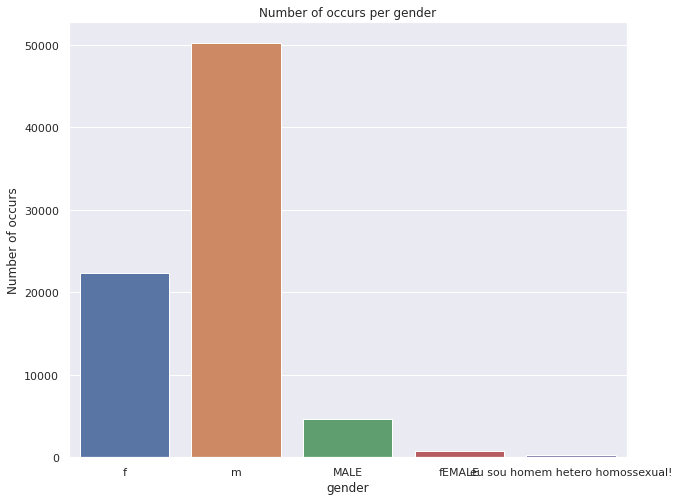

In [22]:
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
sns.countplot(x=df['gender'])
plt.xlabel("gender")
plt.ylabel("Number of occurs")
plt.title('Number of occurs per gender')
plt.show()

muitos dados estão registrado de maneira incorreta! não podemos deletá-los, vamos repaginá-los:

In [23]:
df["gender"].replace("MALE", "m", inplace=True)
df["gender"].replace("fEMALE", "f", inplace=True)
df["gender"].replace("eu sou homem hetero homossexual!", "m", inplace=True)

agora os homens heteros homossexuais estão no lugar certo!

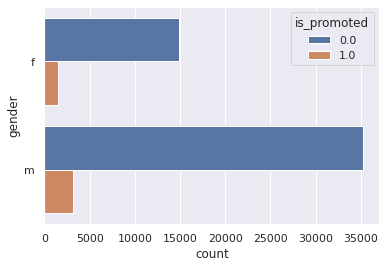

In [24]:
sns.countplot(y='gender', hue='is_promoted', data=df)

que lindo, as promoções parecem balenceadas!!!! seria melhor ainda se houvessem mais mulheres contratadas pela empresa né... #quemnãolacranãolucra

Quinta coluna: Recrutamento

In [25]:
print(pd.Series(df.recruitment_channel.unique()), end='\n\n')

0    sourcing
1       other
2    referred
dtype: object



até aqui tudo certo!

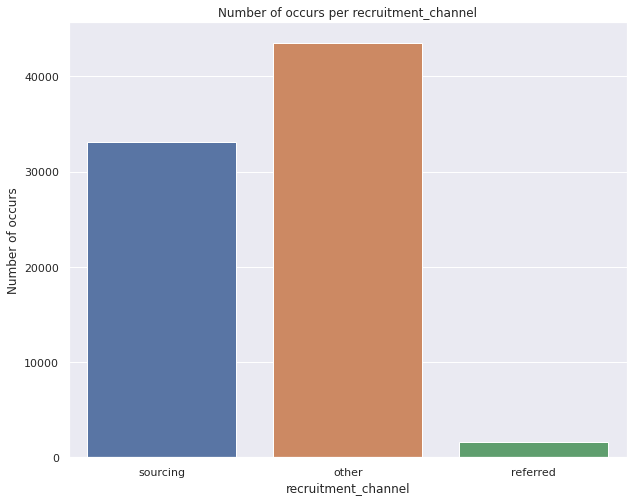

In [26]:
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")
sns.countplot(x=df['recruitment_channel'])
plt.xlabel("recruitment_channel")
plt.ylabel("Number of occurs")
plt.title('Number of occurs per recruitment_channel')
plt.show()

poucas pessoas indicadas para a empresa, mas tá tudo certo tb!

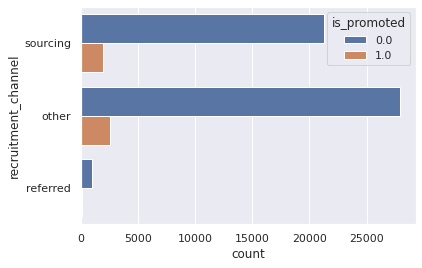

In [27]:
sns.countplot(y='recruitment_channel', hue='is_promoted', data=df)

Vamos para os dados numéricos!

In [28]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,0-Treino/1-Teste
count,78260.000000,71344.000000,78260.000000,72328.000000,78260.000000,78260.000000,70805.000000,54779.000000,78260.000000
mean,39148.726412,1.256770,201.978814,3.332292,5.849796,0.022642,63.432018,0.085087,0.300038
std,22604.388558,0.610465,4539.226129,1.260995,4.248614,0.148762,13.466868,0.279014,0.458277
min,1.000000,1.000000,-32.000000,1.000000,1.000000,0.000000,39.000000,0.000000,0.000000
25%,19570.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000,0.000000
50%,39148.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000,0.000000
75%,58725.250000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000,1.000000
max,78298.000000,10.000000,123456.000000,5.000000,37.000000,1.000000,99.000000,1.000000,1.000000


temos um dinossauro escondido na empresa!

Sexta coluna: Treinamentos

In [29]:
print(pd.Series(df.no_of_trainings.unique()), end='\n\n')

0      1.0
1      2.0
2      NaN
3      3.0
4      4.0
5      7.0
6      5.0
7      6.0
8      8.0
9     10.0
10     9.0
dtype: float64



NaN é muito paia 👎🏻

In [30]:
print(df[df['no_of_trainings'].notna() == False].count())

employee_id             6916
department              6916
region                  6916
education               6916
gender                  6916
recruitment_channel     6916
no_of_trainings            0
age                     6916
previous_year_rating    6525
length_of_service       6916
awards_won?             6916
avg_training_score      2072
is_promoted             4844
0-Treino/1-Teste        6916
dtype: int64


quase 7 mil empregados sem registro de treinamentos... será que não fizeram?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


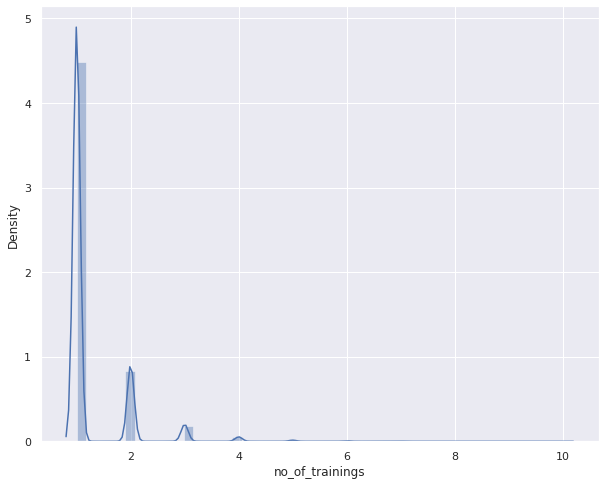

In [31]:
plt.figure(figsize=(10,8))
sns.distplot(df['no_of_trainings'].dropna())
plt.show()

é o que faz mais sentido... vamos atribuir o valor de zero para eles!

In [32]:
df['no_of_trainings'] = df['no_of_trainings'].fillna(0)

agora um graficozinho básico

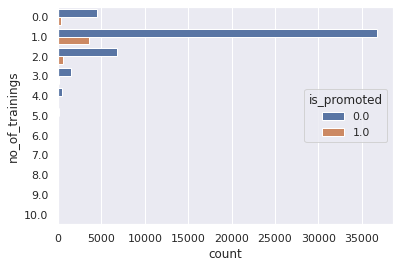

In [33]:
sns.countplot(y='no_of_trainings', hue='is_promoted', data=df)

ok, parece fazer sentido também... mas os treinamento não ajudam muito na promoção né?

Sétima coluna: idade

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


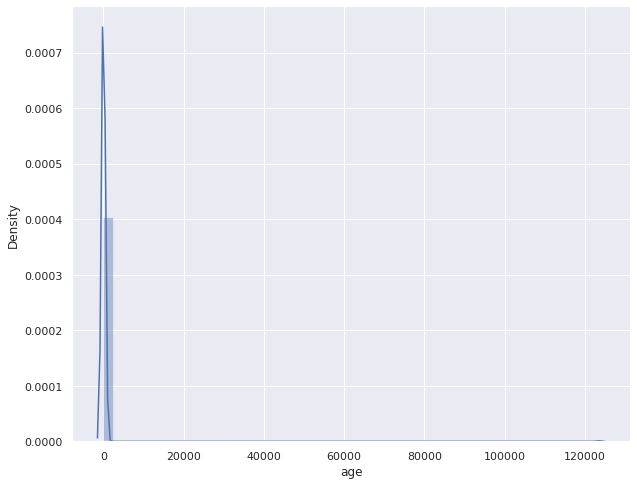

In [34]:
plt.figure(figsize=(10,8))
sns.distplot(df['age'].dropna())
plt.show()

essa tá trevas slc vamo colocar um padrão aí

In [35]:
print(pd.Series(df.age.unique()), end='\n\n')

0         35
1         30
2         34
3         39
4         45
5         31
6         33
7         28
8         32
9         49
10        37
11        38
12        41
13        27
14        29
15        26
16        24
17        57
18        40
19        42
20        23
21        59
22        44
23        50
24        56
25        20
26        25
27        47
28        36
29        46
30        60
31        43
32        22
33        54
34        58
35    123456
36        48
37        53
38        55
39        51
40        52
41        21
42       -32
dtype: int64



um dinossauro trabalhando e um feto planejado para 2054! já nasce empregado, vida boa

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


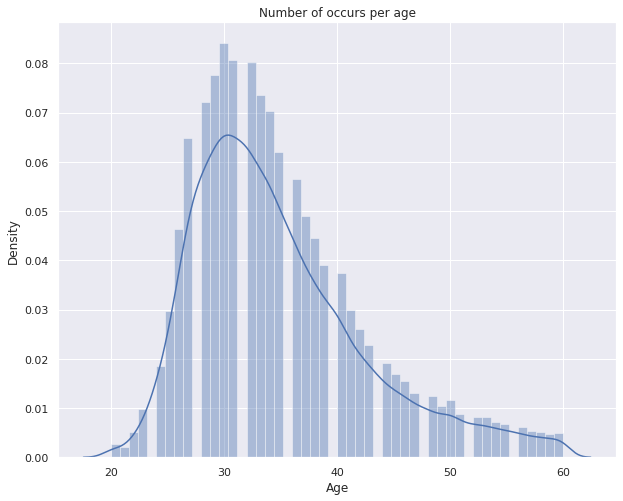

In [36]:
df = df[df['age'] > 0]
df = df[df['age'] <= 110]

plt.figure(figsize=(10,8))
sns.distplot(x=df['age'].dropna())
plt.xlabel("Age")
plt.ylabel("Density")
plt.title('Number of occurs per age')
plt.show()

agora tá bonito ein!

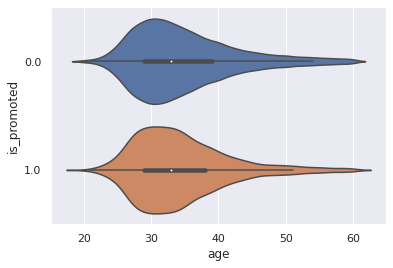

In [37]:
sns.violinplot(x='age', y='is_promoted', orient ='h', data=df)

pessoal mais velho costuma ser mais promovido, mas por um diferença bem pequena.

Oitava coluna: avaliação do ano anterior

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


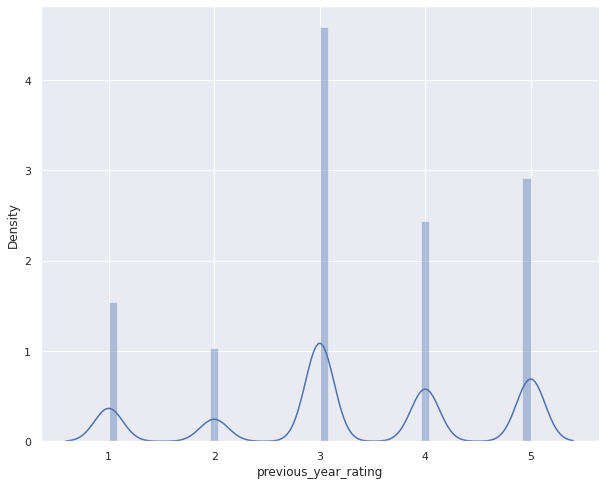

In [38]:
plt.figure(figsize=(10,8))
sns.distplot(df['previous_year_rating'].dropna())
plt.show()

média poli tá baixa ein...

In [39]:
print(pd.Series(df.previous_year_rating.unique()), end='\n\n')

0    5.0
1    3.0
2    1.0
3    4.0
4    NaN
5    2.0
dtype: float64



de novo esse NaN, não aguento mais!

In [40]:
print(df[df['previous_year_rating'].notna() == False].count())

employee_id             5889
department              5889
region                  5889
education               5889
gender                  5889
recruitment_channel     5889
no_of_trainings         5889
age                     5889
previous_year_rating       0
length_of_service       5889
awards_won?             5889
avg_training_score      5469
is_promoted             4077
0-Treino/1-Teste        5889
dtype: int64


muitas pessoas né, ainda não devem ter recebido avaliações... mas como inserí-los no dataset? é um pouco injusto atribuir nota zero né... que tal a média?

In [41]:
df['previous_year_rating'] = df['previous_year_rating'].fillna(3)

melhor assim... a nota zero complicaria um pouco na promoção dos nossos empregados do ano passado, mesmo que fossem muito bons!

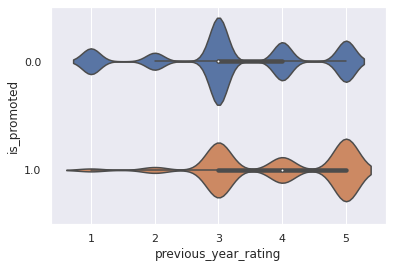

In [42]:
sns.violinplot(x='previous_year_rating', y='is_promoted', orient ='h', data=df)

a avaliação parece influencia na promoção, pois pessoas com nota baixa não tem mais dificuldade de promoção!

Nona coluna: Anos de serviço

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


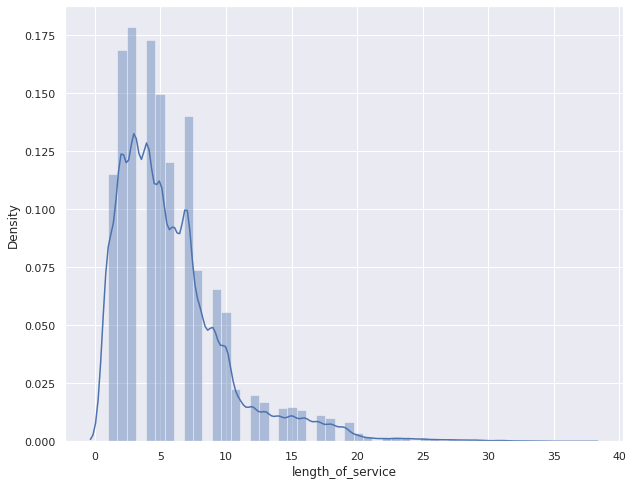

In [43]:
plt.figure(figsize=(10,8))
sns.distplot(df['length_of_service'].dropna())
plt.show()

In [44]:
print(pd.Series(df.length_of_service.unique()), end='\n\n')

0      8
1      4
2      7
3     10
4      2
5      5
6      6
7      1
8      3
9     16
10     9
11    11
12    26
13    12
14    17
15    14
16    13
17    19
18    15
19    23
20    18
21    20
22    22
23    25
24    28
25    24
26    31
27    21
28    29
29    30
30    34
31    27
32    33
33    32
34    37
dtype: int64



NÃO TEM NAN!!!! 😁😁😁😁😁😁😁😁

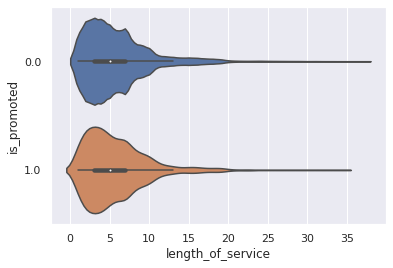

In [45]:
sns.violinplot(x='length_of_service', y='is_promoted', orient ='h', data=df)

dinossauros não tem muita prioridade na hora da promoção não...

Décima coluna: prêmios ganhos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


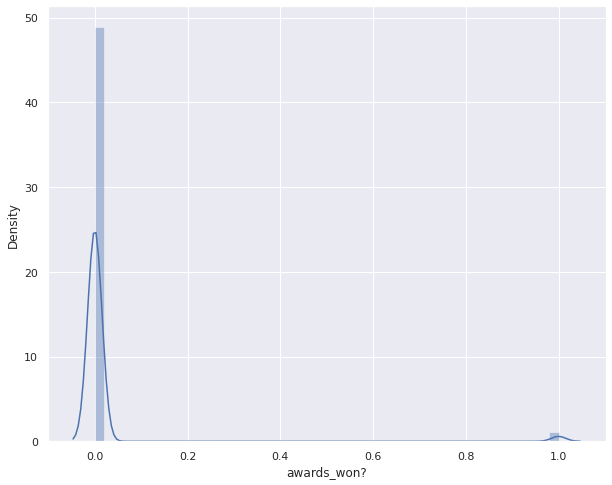

In [46]:
plt.figure(figsize=(10,8))
sns.distplot(df['awards_won?'].dropna())
plt.show()

esses prêmio tá concorrido slc

In [47]:
print(pd.Series(df['awards_won?'].unique()), end='\n\n')

0    0
1    1
dtype: int64



tá suave tropa segue o jogo

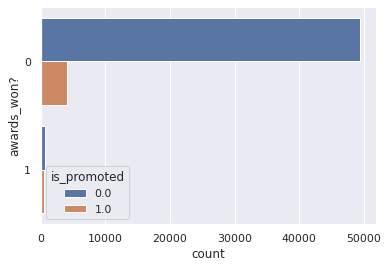

In [48]:
sns.countplot(y='awards_won?', hue='is_promoted', data=df)

gráfico gleds, mas percebe-se que os prêmios influenciam BASTANTE na promoção

Décima primeira coluna: pontuação nos treinamentos

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


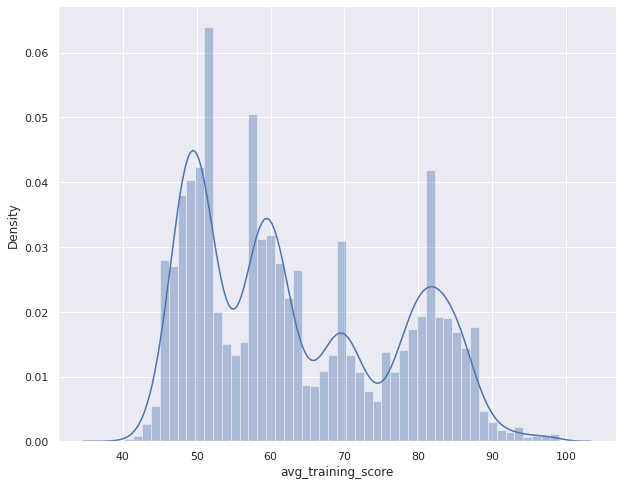

In [49]:
plt.figure(figsize=(10,8))
sns.distplot(df['avg_training_score'].dropna())
plt.show()

provinha tá justa vai, não foi feita pelo Albertini.

In [50]:
print(df[df['avg_training_score'].notna() == False].count())

employee_id             7430
department              7430
region                  7430
education               7430
gender                  7430
recruitment_channel     7430
no_of_trainings         7430
age                     7430
previous_year_rating    7430
length_of_service       7430
awards_won?             7430
avg_training_score         0
is_promoted             7430
0-Treino/1-Teste        7430
dtype: int64


alguns NaN... serão de pessoas que não fizeram treinamentos? vamos atribuir a média pra eles!

In [51]:
df['avg_training_score'].mean()

63.436108086706916

média 63 (sim, eu fiz lab de fisica A)

In [52]:
df['avg_training_score'] = df['avg_training_score'].fillna(63)

ok, acho que a média será justa pra eles

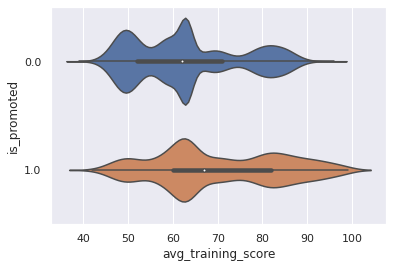

In [53]:
sns.violinplot(x='avg_training_score', y='is_promoted', orient = 'h', data=df)

e a pontuação de treinamento influencia bastante na promoção ein!

Última coluna: promoção!

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


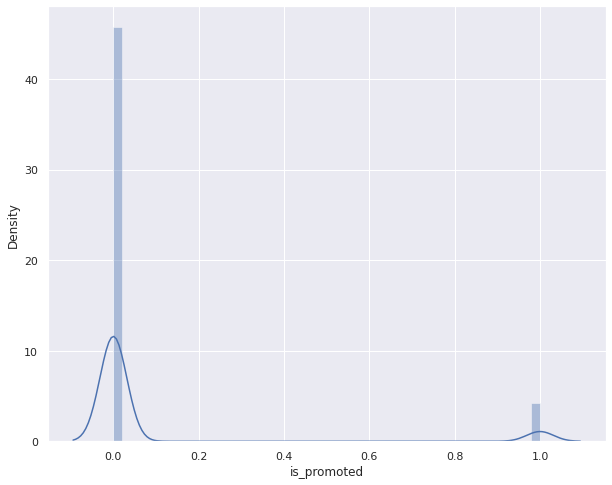

In [54]:
plt.figure(figsize=(10,8))
sns.distplot(df['is_promoted'].dropna())
plt.show()

até então tudo certo!

In [55]:
print(pd.Series(df['is_promoted'].unique()), end='\n\n')

0    0.0
1    1.0
2    NaN
dtype: float64



os NaNs estão aqui! mas tá certo, nossos dados de teste realmente não tem valor na promoção! vamos separar os dados de novo!

In [56]:
dftr = df[df['0-Treino/1-Teste'] == 0]
dfte = df[df['0-Treino/1-Teste'] == 1]

agora vamos ver só o dataset de treino né

In [57]:
print(pd.Series(dftr['is_promoted'].unique()), end='\n\n')

0    0.0
1    1.0
dtype: float64



bom demais sem nan! segue o jogo fml

vamos analisar um pouquinho nossos dados agora!

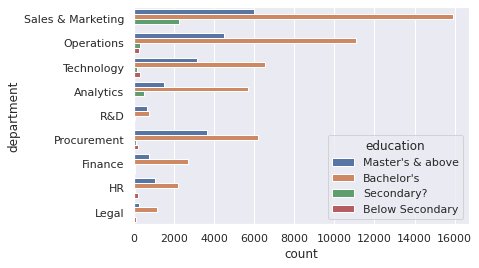

In [58]:
sns.countplot(y='department', hue='education', data=df)

cada cargo tem sua peculiaridade sobre a escolaridade... por exemplo a área de operações precisa de uma formação maior, assim como tecnologia.

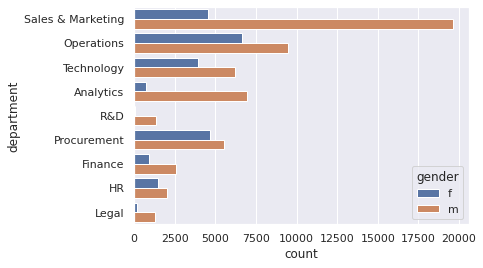

In [59]:
sns.countplot(y='department', hue='gender', data=df)

cada área também com sua pecualidade, muitas sendo majoritariamente masculinas

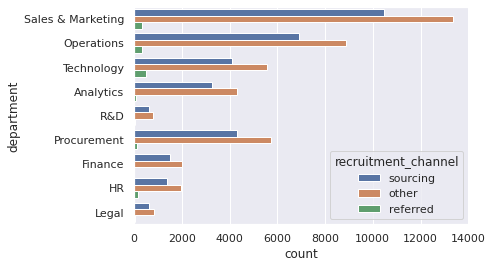

In [60]:
sns.countplot(y='department', hue='recruitment_channel', data=df)

toda a empresa segue um padrão de recrutamento!

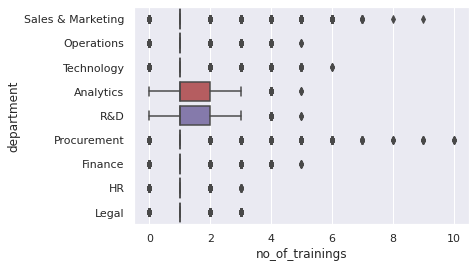

In [61]:
sns.boxplot(x='no_of_trainings', y='department', data=df)

algumas áreas recebem mais treinamentos!

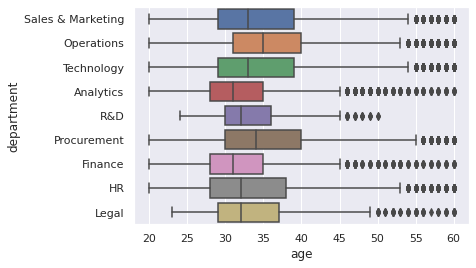

In [62]:
sns.boxplot(x='age', y='department', data=df)

algumas áreas precisam de pessoas mais velhas

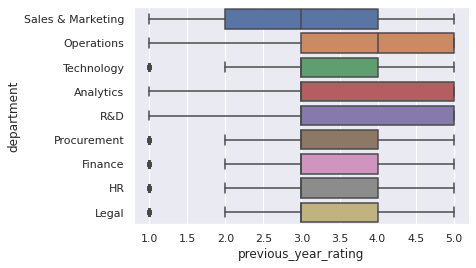

In [63]:
sns.boxplot(x='previous_year_rating', y='department', data=df)

algumas áreas tem melhor avaliação, e a área de vendas tem uma avaliação menor

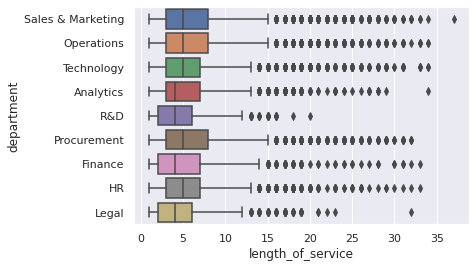

In [64]:
sns.boxplot(x='length_of_service', y='department', data=df)

pessoal de R&D e Legal ficam menos tempo na empresa

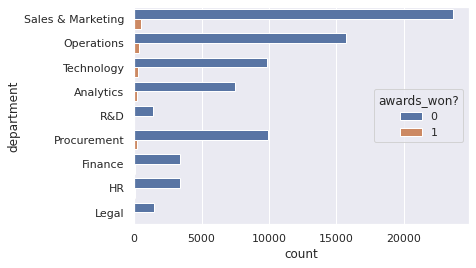

In [65]:
sns.countplot(y='department', hue='awards_won?', data=df)

alguns departamentos não vem recebendo muitos prêmios

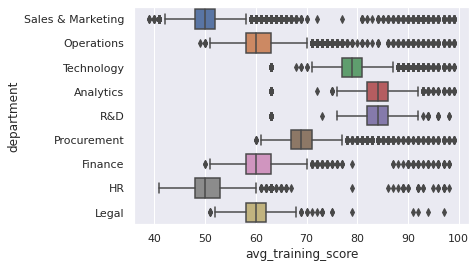

In [66]:
sns.boxplot(x='avg_training_score', y='department', data=df)

pessoal de vendas e RH n tá mandando mt bem nos treinamentos, mas os analistas e R&D tão mandando bala

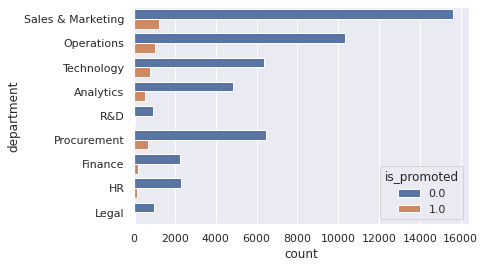

In [67]:
sns.countplot(y='department', hue='is_promoted', data=df)

alguns departamentos tem mais dificuldade na promoção

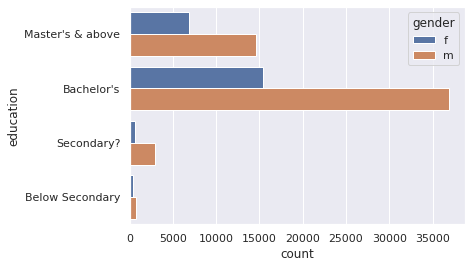

In [68]:
sns.countplot(y='education', hue='gender', data=df)

educação desbalanceada, mas porque o gêneros dos contratados já é de maneira geral

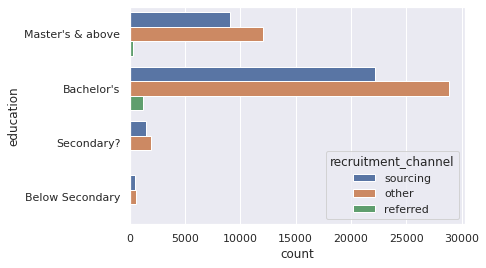

In [69]:
sns.countplot(y='education', hue='recruitment_channel', data=df)

existe um padrão de recrutamento na empresa inteira

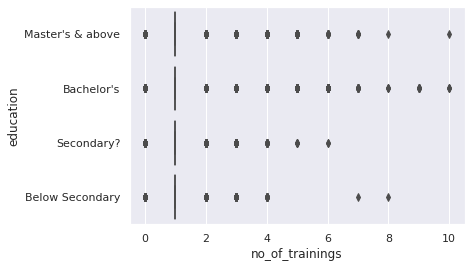

In [70]:
sns.boxplot(x='no_of_trainings', y='education', data=df)

pessoal com menos nível educacional recebem menos treinamentos (talvez exerçam cargos com menos técnica envolvida?)

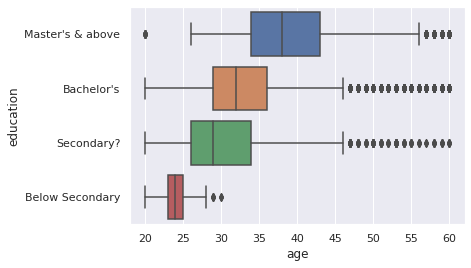

In [71]:
sns.boxplot(x='age', y='education', data=df)

aqui parece comprovar que os dados nulos pertencem a estudantes do ensino médio, visto a escada na idade de contratação

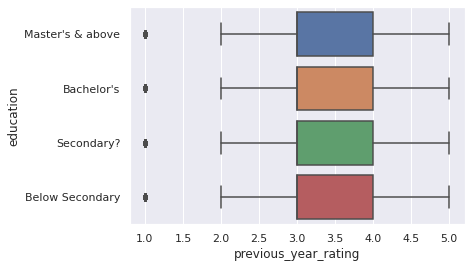

In [72]:
sns.boxplot(x='previous_year_rating', y='education', data=df)

avaliação constante pelos níveis de graduação

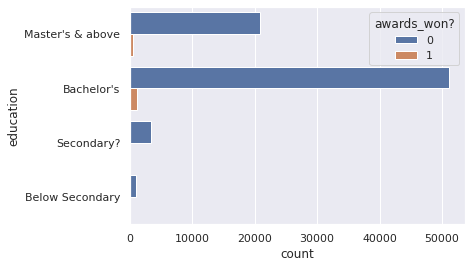

In [73]:
sns.countplot(y='education', hue='awards_won?', data=df)

mais prêmios para mais graduados

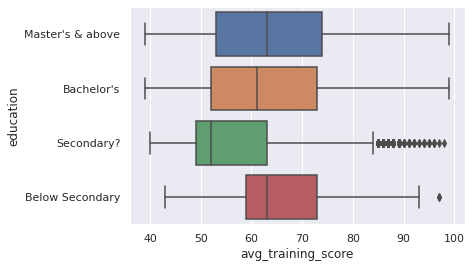

In [74]:
sns.boxplot(x='avg_training_score', y='education', data=df)

pessoal do ensino médio tá mandando mal nos treinamentos slc

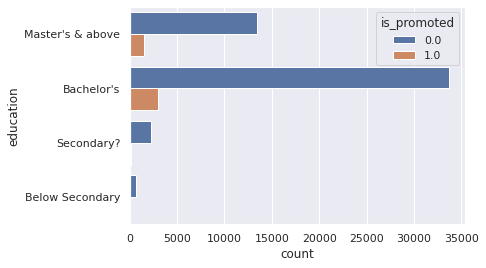

In [75]:
sns.countplot(y='education', hue='is_promoted', data=df)

a promoção vem com mais facilidade para melhores graduados

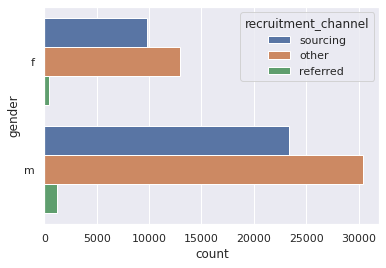

In [76]:
sns.countplot(y='gender', hue='recruitment_channel', data=df)

mais um padrão do recrutamento

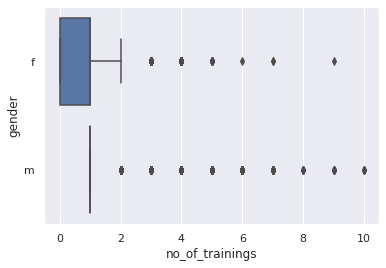

In [77]:
sns.boxplot(x='no_of_trainings', y='gender', data=df)

mulheres recebem menos treinamento (?)

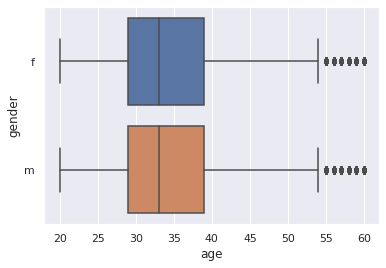

In [78]:
sns.boxplot(x='age', y='gender', data=df)

idade de contratação é padrão

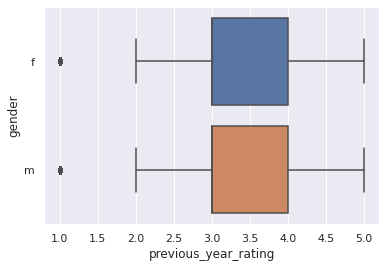

In [79]:
sns.boxplot(x='previous_year_rating', y='gender', data=df)

avaliação é padrão

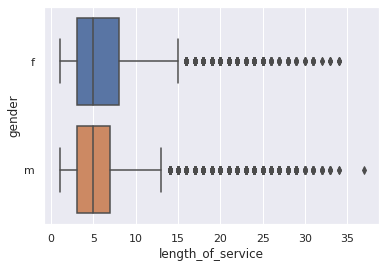

In [80]:
sns.boxplot(x='length_of_service', y='gender', data=df)

mulheres tem por padrão um maior tempo de serviço

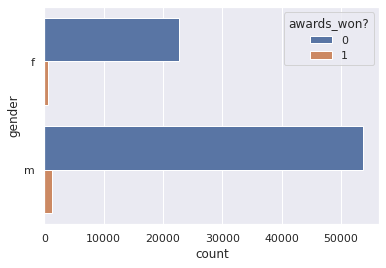

In [81]:
sns.countplot(y='gender', hue='awards_won?', data=df)

padrão de premiação entre gêneros na proporção

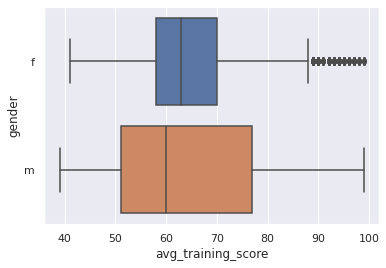

In [82]:
sns.boxplot(x='avg_training_score', y='gender', data=df)

mulheres tem um padrão mais coeso de pontuação nos treinmentos, enquanto os homens dissipam mais

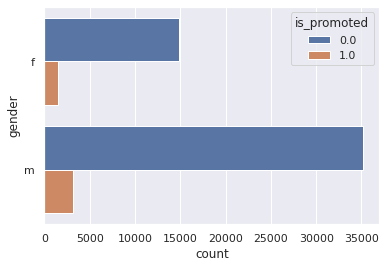

In [83]:
sns.countplot(y='gender', hue='is_promoted', data=df)

promoção equivalente entre os gêneros na proporção

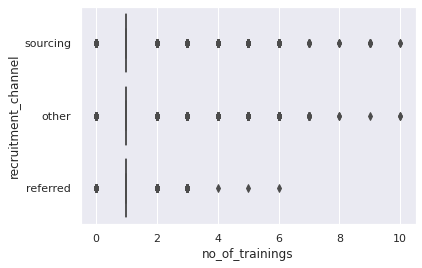

In [84]:
sns.boxplot(x='no_of_trainings', y='recruitment_channel', data=df)

pessoas indicadas não recebem uma quantidade grande de treinamentos

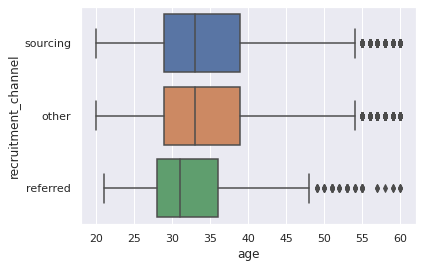

In [85]:
sns.boxplot(x='age', y='recruitment_channel', data=df)

pessoas indicadas costumam ser mais novas

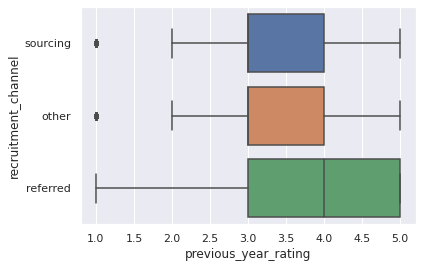

In [86]:
sns.boxplot(x='previous_year_rating', y='recruitment_channel', data=df)

pessoas indicadas tem uma avaliação melhor

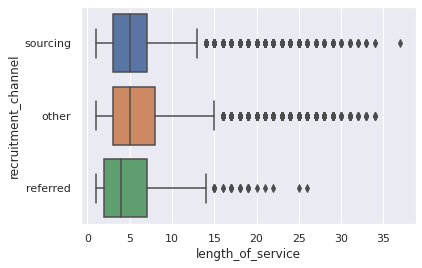

In [87]:
sns.boxplot(x='length_of_service', y='recruitment_channel', data=df)

pessoas indicadas ficam menos tempo na empresa

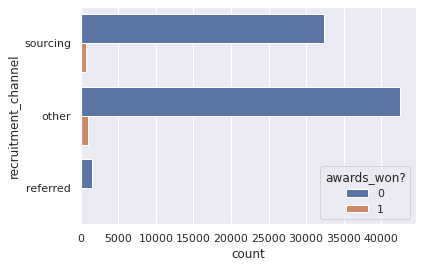

In [88]:
sns.countplot(y='recruitment_channel', hue='awards_won?', data=df)

padrão de premiação

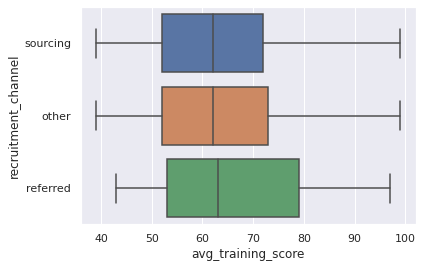

In [89]:
sns.boxplot(x='avg_training_score', y='recruitment_channel', data=df)

pessoas indicadas tem melhor pontuação nos treinamentos

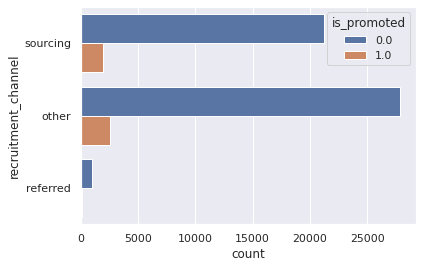

In [90]:
sns.countplot(y='recruitment_channel', hue='is_promoted', data=df)

padrão de promoção nos canais de recrutamento

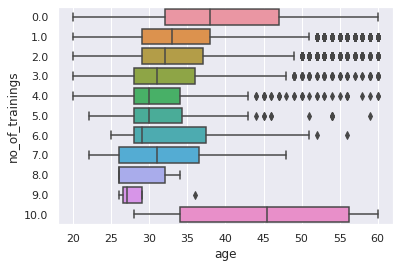

In [91]:
sns.boxplot(x='age', y='no_of_trainings', orient ='h', data=df)

pessoas mais novas recebem mais treinamento

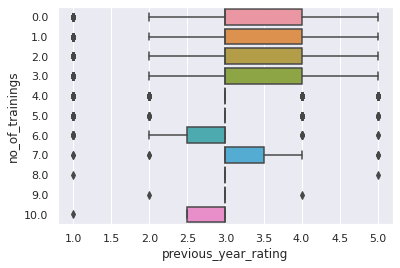

In [92]:
sns.boxplot(x='previous_year_rating', y='no_of_trainings', orient ='h', data=df)

pessoas mais treinamento tiveram menor avaliação nos anos passados

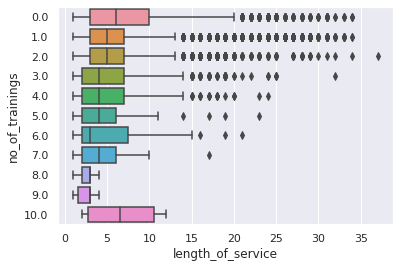

In [93]:
sns.boxplot(x='length_of_service', y='no_of_trainings', orient ='h', data=df)

pessoas com menos tempo de serviço recebem mais treinamento

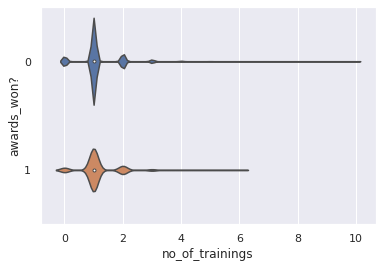

In [94]:
sns.violinplot(x='no_of_trainings', y='awards_won?', orient='h', data=df)

percebe-se que pessoas com muitos treinamento não costumam receber prêmios, talvez pelo desempenho baixo que as faz precisar mais destes treinos

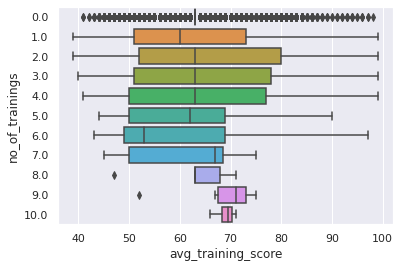

In [95]:
sns.boxplot(x='avg_training_score', y='no_of_trainings', orient ='h', data=df)

pessoas com mais treinamentos costumam ter a média de treinamentos um pouco maior. aqui também comprovamos que as pessoas com NaN na média de treinamentos não tinham realizado nenhum treinamento! porém, ainda acho justo analisá-los no modelo

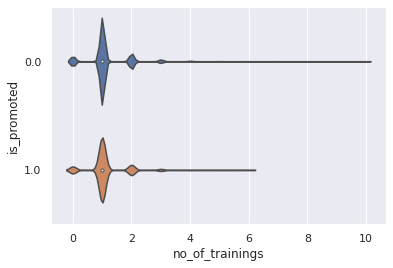

In [96]:
sns.violinplot(x='no_of_trainings', y='is_promoted', orient='h',data=df)

pessoas com muitos treinamentos também não costumam ser promovidas

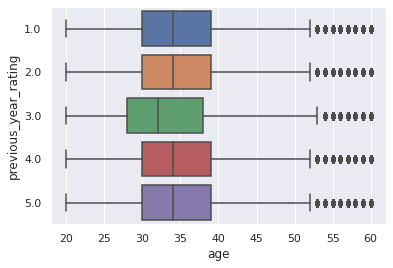

In [97]:
sns.boxplot(x='age', y='previous_year_rating', orient='h', data=df)

A idade não influencia na avaliação do ano passado.

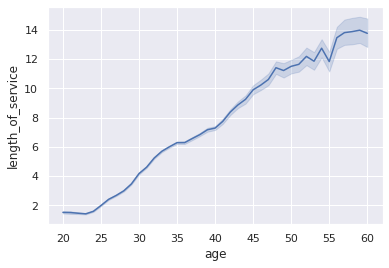

In [98]:
sns.lineplot(x='age', y='length_of_service', data=df)

Quanto mais idade, maiores os anos de serviço.

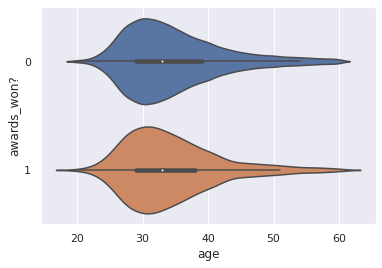

In [99]:
sns.violinplot(x='age', y='awards_won?', orient='h', data=df)

O numero de premios não se relaciona com a idade.

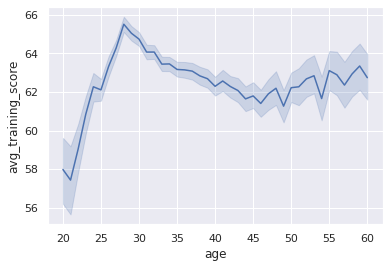

In [100]:
sns.lineplot(x='age', y='avg_training_score', data=df)

até os 28 anos a pontuação dos treinamentos vai aumentando, depois regride e se estabiliza

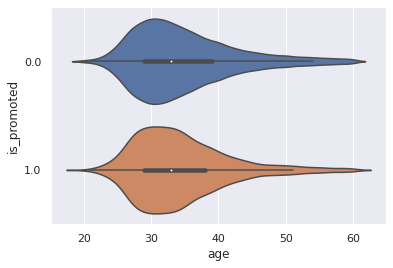

In [101]:
sns.violinplot(x='age', y='is_promoted', orient='h',data=df)

A partir dos 30 anos, as pessoas tendem mais a serem promovidas.

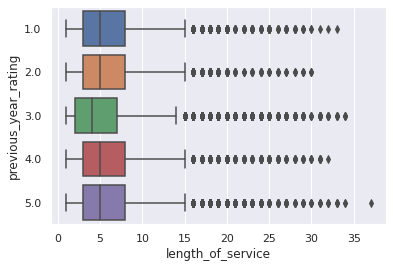

In [102]:
sns.boxplot(x='length_of_service', y='previous_year_rating', orient ='h', data=df)

Os anos de serviço não influenciam nas avaliações.

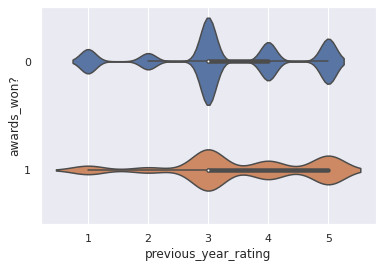

In [103]:
sns.violinplot(x='previous_year_rating', y='awards_won?', orient='h', data=df)

Caso a avaliação da pessoa tenha sido maior que 3 no ano passado, ela tende a ganhar mais premios.

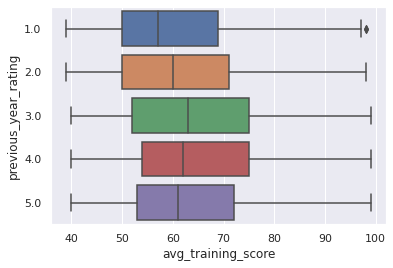

In [104]:
sns.boxplot(x='avg_training_score', y='previous_year_rating', orient ='h', data=df)

Pessoas com maior pontuação nos treinamentos tendem a ter melhores avaliações, apesar de existir um recesso a partir da avaliação com 4 pontos (se acomodaram?)

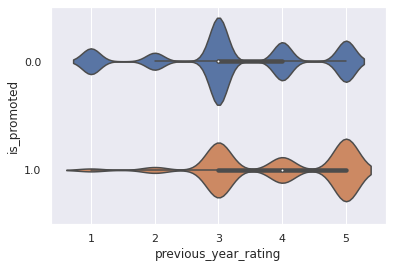

In [105]:
sns.violinplot(x='previous_year_rating', y='is_promoted', orient='h',data=df)

Das pessoas promovidas, a maioria teve avaliação maior que 3.

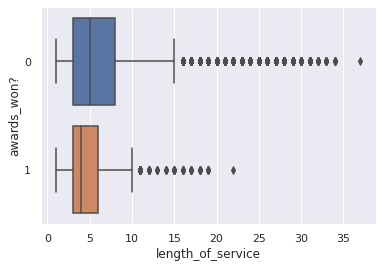

In [106]:
sns.boxplot(x='length_of_service', y='awards_won?', orient='h', data=df)

os anos de serviço não fazem você ganhar mais prêmios

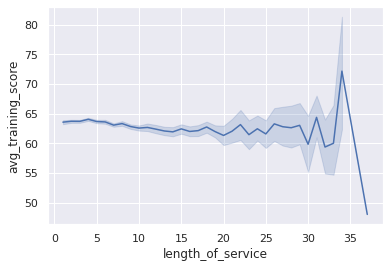

In [107]:
sns.lineplot(x='length_of_service', y='avg_training_score', data=df)

percebe-se que as médias de treinamento seguem um padrão ao longo dos anos de serviço (os ruídos ao final são devidos aos outliers)

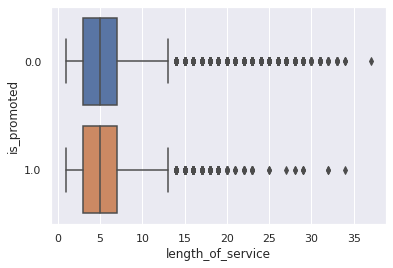

In [108]:
sns.boxplot(x='length_of_service', y='is_promoted', orient='h',data=df)

O número de anos de serviço não influencia na promoção.

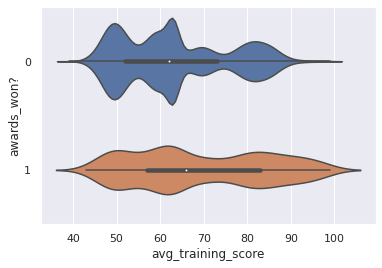

In [109]:
sns.violinplot(x='avg_training_score', y='awards_won?', orient='h', data=df)

pessoas que ganham prêmios tem pontuação maior nos treinamentos

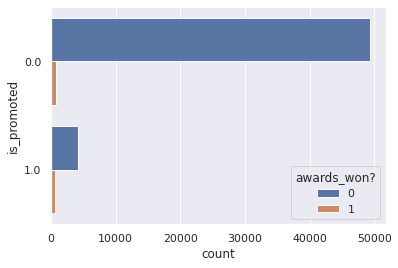

In [110]:
sns.countplot(y='is_promoted', hue='awards_won?', data=df)

pessoas com premiação tendem a ser mais promovidas

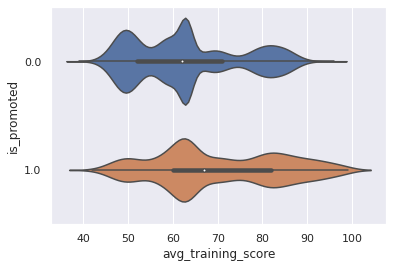

In [111]:
sns.violinplot(x='avg_training_score', y='is_promoted', orient='h', data=df)

Pessoas que são promovidas tendem a ter uma pontuação maior de treinamento.

Ok, agora temos uma boa noção de como nossos dados se comportam (talvez noção até demais). Vamos modelar?

Predição dos dados

In [112]:
dfd = pd.get_dummies(df)
dfd

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted,0-Treino/1-Teste,department_Analytics,...,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,education_Secondary?,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,1.0,35,5.0,8,0,49.0,0.0,0,0,...,0,0,0,1,0,1,0,0,0,1
1,65141,1.0,30,5.0,4,0,60.0,0.0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,7513,1.0,34,3.0,7,0,50.0,0.0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,2542,2.0,39,1.0,10,0,50.0,0.0,0,0,...,0,1,0,0,0,0,1,1,0,0
4,48945,1.0,45,3.0,2,0,73.0,0.0,0,0,...,0,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,53478,1.0,24,3.0,1,0,61.0,NaN,1,0,...,0,0,1,0,0,0,1,0,0,1
78294,25600,1.0,31,3.0,7,0,74.0,NaN,1,0,...,0,1,0,0,0,0,1,0,0,1
78295,45409,1.0,26,4.0,4,0,50.0,NaN,1,0,...,0,1,0,0,0,1,0,0,0,1
78296,1186,3.0,27,3.0,1,0,70.0,NaN,1,0,...,0,1,0,0,0,0,1,0,0,1


In [113]:
dfdtr = dfd[dfd['0-Treino/1-Teste'] == 0]
dfdtr = dfdtr.drop('0-Treino/1-Teste', axis=1)
dfdte = dfd[dfd['0-Treino/1-Teste'] == 1]
dfdte = dfdte.drop('0-Treino/1-Teste', axis=1)

In [114]:
from sklearn.linear_model import LinearRegression  # modelo que vamos usar
from sklearn.linear_model import LogisticRegression # segundo modelo que usaremos
from sklearn.model_selection import train_test_split

X = dfdtr.drop('is_promoted', axis=1) # Cria uma cópia do dataset sem a coluna is_promoted (target)
y = dfdtr['is_promoted']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

Modelo 1: Regressão Linear

In [115]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [116]:
y_test_predict = lr.predict(X_test)

In [117]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_train_predict = lr.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)


print("Perfomance do modelo para os dados de treino")
print("--------------------------------------")
print(f'RMSE: {rmse}')
print(f'R2 score: {r2}')
print("\n")

rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("Perfomance do modelo para os dados de teste")
print("--------------------------------------")
print(f'RMSE: {rmse}')
print(f'R2 score: {r2}')
print("\n")

Perfomance do modelo para os dados de treino
--------------------------------------
RMSE: 0.2608793548921905
R2 score: 0.12758407795946947


Perfomance do modelo para os dados de teste
--------------------------------------
RMSE: 0.2573080377807932
R2 score: 0.14338498511327058




acabou não sendo um modelo muito legal para os nossos dados....

Modelo 2: Regressão Logística

In [118]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [119]:
from sklearn.metrics import accuracy_score

y_train_predict = logreg.predict(X_train)
y_test_predict = logreg.predict(X_test)

print(f'Acurácio no treino: {accuracy_score(y_train, y_train_predict)}')
print(f'Acurácio no teste: {accuracy_score(y_test, y_test_predict)}')

Acurácio no treino: 0.9147155661240168
Acurácio no teste: 0.9154929577464789


Esse aqui tá embaçado slc, um bom modelo!

Modelo 3: árvore de decisão por gini

In [120]:
from sklearn.tree import DecisionTreeClassifier

clf_model = DecisionTreeClassifier(
    criterion="gini",
    random_state=42,
    max_depth=3,
    min_samples_leaf=5
)

clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [121]:
y_predict = clf_model.predict(X_test)

In [122]:
accuracy_score(y_test,y_predict)

0.9226266691055424

Esse tá bom também ein, melhor que a regressão logística, porém vamos mexer um pouco nos parâmetros

In [123]:
from sklearn.tree import DecisionTreeClassifier

clf_model = DecisionTreeClassifier(
    criterion="gini",
    random_state=42,
    max_depth=10,
    min_samples_leaf=1
)

clf_model.fit(X_train,y_train)

y_predict = clf_model.predict(X_test)

accuracy_score(y_test,y_predict)

0.9317724528992135

Aumentando a max_depth conseguimos uma acurácia maior, porém a partir de 15 ela começa a aumentar bem pouco, de maneira pouco relevante. Nosso min_samples_leaf quanto menor tem maior acurácia

Modelo 4: árvore de decisão por entropia

In [124]:
clf_model_2 = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42,
    max_depth=5
)
clf_model_2.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [125]:
Y_predict = clf_model_2.predict(X_test)

In [126]:
accuracy_score(y_test, Y_predict)

0.9240899945125297

Ainda melhor inicialmente... tamo embaçado

In [127]:
clf_model_2 = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42,
    max_depth=10
)
clf_model_2.fit(X_train , y_train)

Y_predict = clf_model_2.predict(X_test)

accuracy_score(y_test, Y_predict)

0.9318639107371501

Um pouquinho melhor...

Modelo 5: árvore aleatório por entropia

In [128]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    max_depth=25,
    n_estimators=200,
    min_samples_split=50,
    criterion='entropy',
    oob_score=True,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, min_samples_split=50,
                       n_estimators=200, oob_score=True, random_state=42)

In [129]:
predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.926
Mean accuracy score: 0.926


Esse é bom também, mas deve dar pra melhorar

In [130]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    max_depth=50,
    n_estimators=200,
    min_samples_split=10,
    criterion='entropy',
    oob_score=True,
    random_state=42
)

rf.fit(X_train, y_train)

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.93
Mean accuracy score: 0.931


Os n_estimators não influenciam muito na acurácia. O min_samples_split baixo influenciou, e a max_depth maior também. Conseguimos 93.1% de acurárcia.

Modelo 6: KNN

In [131]:
from sklearn.neighbors import KNeighborsClassifier

your_K = 120
model = KNeighborsClassifier(n_neighbors = your_K)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [132]:
print(accuracy_score(y_test, y_predict))

0.9155844155844156


É bom... e vai ficar por assim mesmo. Tentei pra diferentes Ks e obtive acurácias parecidas.

In [133]:
from sklearn.neighbors import KNeighborsClassifier

your_K = 60
model = KNeighborsClassifier(n_neighbors = your_K)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(accuracy_score(y_test, y_predict))

0.9155844155844156


Modelo 7: Naive Bayes

In [134]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

print(accuracy_score(y_test, y_predict))

0.9175050301810865


Parecida com a anterior... pode ser um padrão desse tipo de modelo "ingênuo".

Modelo 8: SVM

Os modelos SVM demoram um tempo gigante para executar. Temos modelos bons acima, e não será analisado com este tipo no projeto.

Agora, vou selecionar alguns modelos com boa acurácia pra testar um tamanho diferente do dataset.

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

Árvore de Decisão Gini:

In [136]:
clf_model = DecisionTreeClassifier(
    criterion="gini",
    random_state=42,
    max_depth=10,
    min_samples_leaf=1
)

clf_model.fit(X_train,y_train)

y_predict = clf_model.predict(X_test)

accuracy_score(y_test,y_predict)

0.9276263642460826

Pior que o anterior... vamos ver pra mais exemplos

Árvore de Decisão Entropia:

In [137]:
clf_model_2 = DecisionTreeClassifier(
    criterion="entropy",
    random_state=42,
    max_depth=10
)
clf_model_2.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [138]:
Y_predict = clf_model_2.predict(X_test)

In [139]:
print(accuracy_score(y_test, Y_predict))

0.9267727577586733


A distribuição anterior parecia melhor.

Assim, vamos adotar a distribuição de dados anterior para nosso problema, porém precisamos avaliar qual é o melhor modelo. Vamos utilizar algumas métricas.

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.2)

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

class M1(DecisionTreeClassifier):
    pass
M1.__name__ = 'Model 1'

class M2(RandomForestClassifier):
    pass
M2.__name__ = 'Model 2'

model1 = M1(criterion="gini", random_state=42, max_depth=10, min_samples_leaf=1)
model1.fit(X_train, y_train)

model2 = M1(criterion="entropy", random_state=42, max_depth=10)
model2.fit(X_train, y_train)

model3 = M2(max_depth=50, n_estimators=200, min_samples_split=10, criterion='entropy', oob_score=True, random_state=42)
model3.fit(X_train, y_train)

None

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

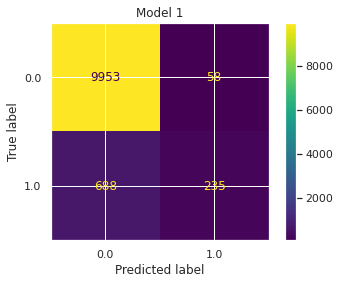

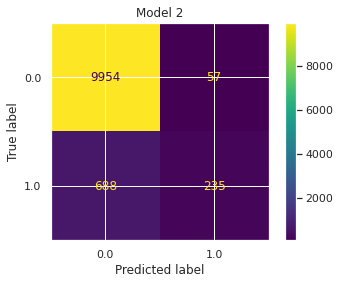

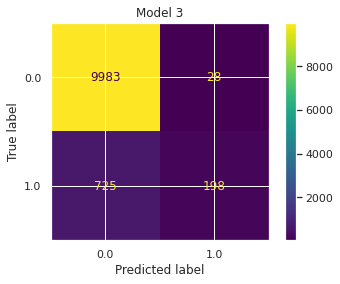

In [141]:
plot_confusion_matrix(model1, X_test, y_test, values_format='d')
plt.title('Model 1')

plot_confusion_matrix(model2, X_test, y_test, values_format='d')
plt.title('Model 2')

plot_confusion_matrix(model3, X_test, y_test, values_format='d')
plt.title('Model 3')

plt.show()

In [143]:
score1 = model1.score(X_test, y_test)
print(f'Accuracy (model 1): {score1*100:.2f}%')

score2 = model2.score(X_test, y_test)
print(f'Accuracy (model 2): {score2*100:.2f}%')

score3 = model3.score(X_test, y_test)
print(f'Accuracy (model 3): {score3*100:.2f}%')

Accuracy (model 1): 93.18%
Accuracy (model 2): 93.19%
Accuracy (model 3): 93.11%


In [144]:
y_pred1 = model1.predict(X_test)
print('MODEL 1')
print(classification_report(y_test, y_pred1))

MODEL 1
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     10011
         1.0       0.80      0.25      0.39       923

    accuracy                           0.93     10934
   macro avg       0.87      0.62      0.68     10934
weighted avg       0.92      0.93      0.92     10934



In [145]:
y_pred2 = model2.predict(X_test)
print('MODEL 2')
print(classification_report(y_test, y_pred2))

MODEL 2
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96     10011
         1.0       0.80      0.25      0.39       923

    accuracy                           0.93     10934
   macro avg       0.87      0.62      0.68     10934
weighted avg       0.92      0.93      0.92     10934



In [146]:
y_pred3 = model3.predict(X_test)
print('MODEL 3')
print(classification_report(y_test, y_pred3))

MODEL 3
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     10011
         1.0       0.88      0.21      0.34       923

    accuracy                           0.93     10934
   macro avg       0.90      0.61      0.65     10934
weighted avg       0.93      0.93      0.91     10934



In [147]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred1).ravel()
print('tn =', tn)
print('fp =', fp)
print('fn =', fn)
print('tp =', tp)
tp/(tp+fp)

tn = 9953
fp = 58
fn = 688
tp = 235


0.8020477815699659

In [148]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred2).ravel()
print('tn =', tn)
print('fp =', fp)
print('fn =', fn)
print('tp =', tp)
tp/(tp+fp)

tn = 9954
fp = 57
fn = 688
tp = 235


0.8047945205479452

In [149]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred3).ravel()
print('tn =', tn)
print('fp =', fp)
print('fn =', fn)
print('tp =', tp)
tp/(tp+fp)

tn = 9983
fp = 28
fn = 725
tp = 198


0.8761061946902655

Ok, eu gostei do random tree classifier, e acredito que será o melhor modelo, principalmente porque acerta mais na promoção.

In [152]:
Xt = dfdte.drop('is_promoted', axis=1) # Cria uma cópia do dataset sem a coluna is_promoted (target)
yt = dfdte['is_promoted']

yt = rf.predict(Xt)

In [153]:
dftr = df[df['0-Treino/1-Teste'] == 0]
dftr = dftr.drop('0-Treino/1-Teste', axis=1)
dfte = df[df['0-Treino/1-Teste'] == 1]
dfte = dfte.drop('0-Treino/1-Teste', axis=1)

In [154]:
dfte['is_promoted'] = yt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


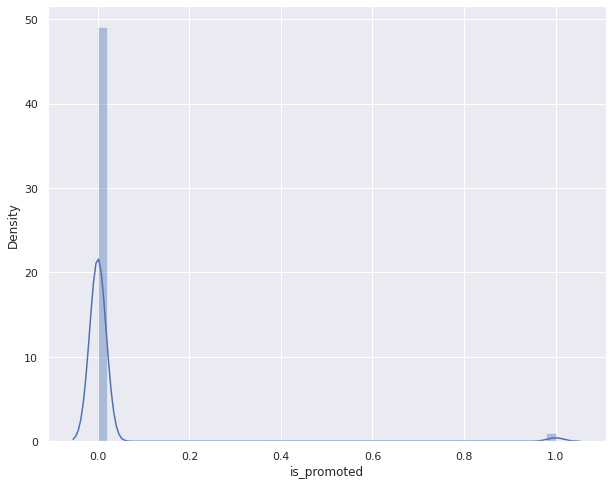

In [155]:
plt.figure(figsize=(10,8))
sns.distplot(dfte['is_promoted'].dropna())
plt.show()

Nosso algoritmo é bem rigoroso... mas há promoções o suficiente para considerarmos válido.

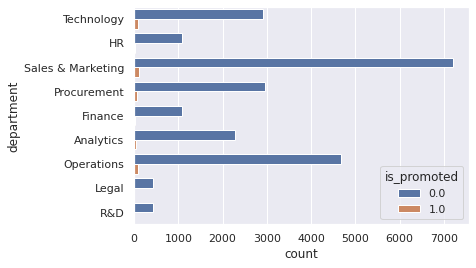

In [156]:
sns.countplot(y='department', hue='is_promoted', data=dfte)

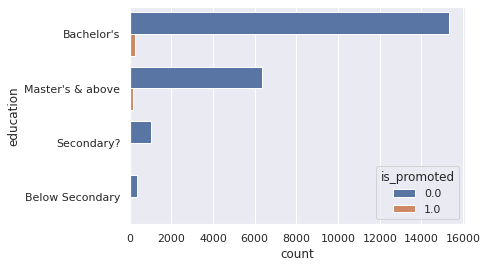

In [157]:
sns.countplot(y='education', hue='is_promoted', data=dfte)

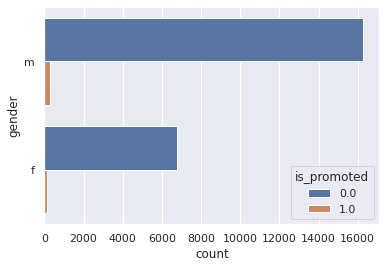

In [158]:
sns.countplot(y='gender', hue='is_promoted', data=dfte)

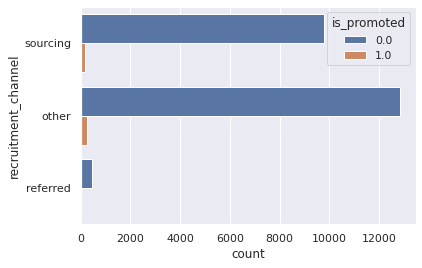

In [159]:
sns.countplot(y='recruitment_channel', hue='is_promoted', data=dfte)

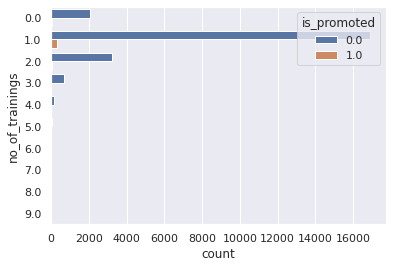

In [160]:
sns.countplot(y='no_of_trainings', hue='is_promoted', data=dfte)

O modelo parece ser bem válido, apesar de menos pessoas terem sido promovidas em proporção como dataset de treino.

Acredito, então, que após mais de 150 blocos de código finalizo aqui o projeto 1. Nossos dados foram limpos de maneira adequada, a análise de dados foi feita de forma bem completa, mostrando algumas nuances do dataset para compreender como a empresa funciona, foram testados diversos modelos diferentes, ao qual as árvores chegaram a resultados mais concisos e desempatamos dentro de seus tipos pelas métricas de desempenho.

Ao final, criamos a coluna de promoção no dataset de teste que obteve resultados consistentes, mesmo que a promoção tenha sido bem rigorosa. Mesmo assim, acredito que seria um resultado pertinente para a empresa, visto que as promoção indicadas pelo modelo são bem merecidas dentro de todos os critérios avaliados (lembrando que vimos a importância de todos ao longo do dataset, mesmo os que pareciam mais inocentes como a região, podem ser fatores importantes para decidir a promoção).

Assim, agradeço ao pessoal responsável pelo projetinho pela oportunidade, e pelo aprendizado gigantesco que o projeto ofereceu. Valeu rapaziada, espero ter mandado bem!